Die 200 häufigsten Wörter wurden in 'wo_synonym_replacement.txt' gespeichert.


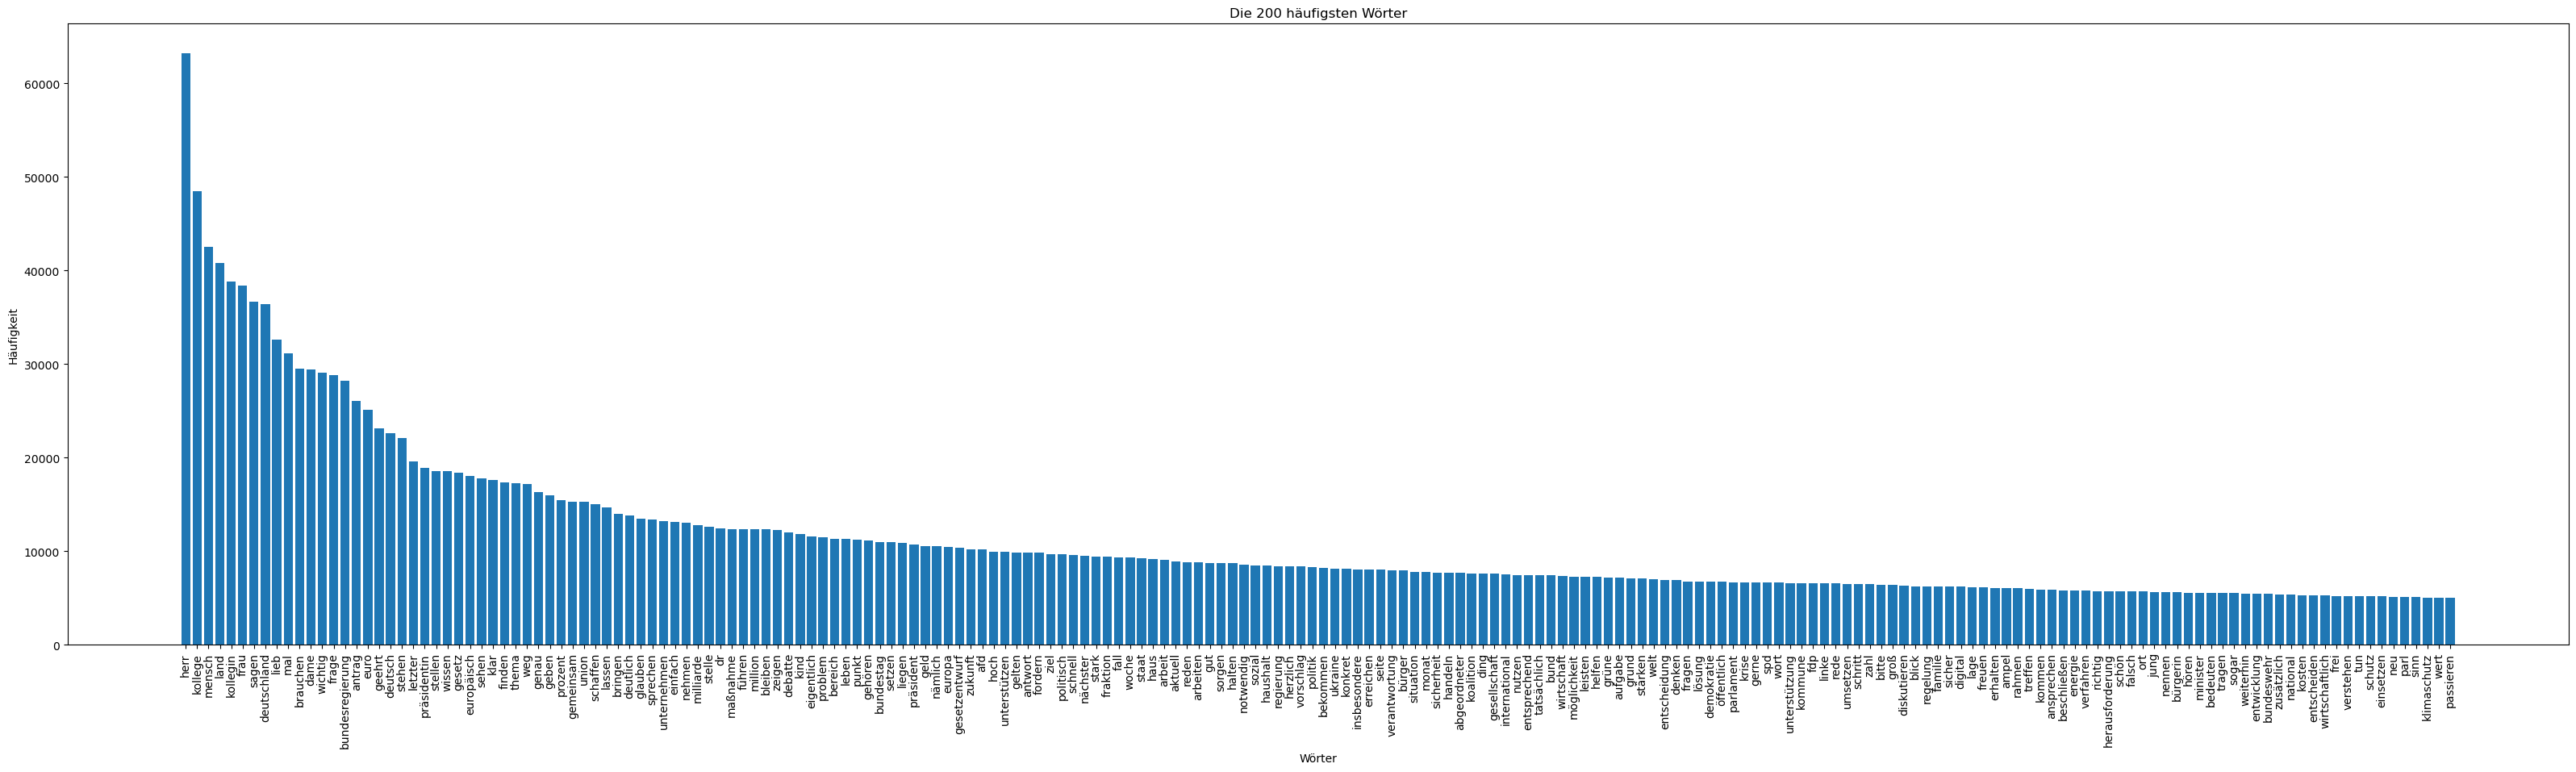

Die 200 häufigsten Wörter wurden in 'w_synonym_replacement.txt' gespeichert.


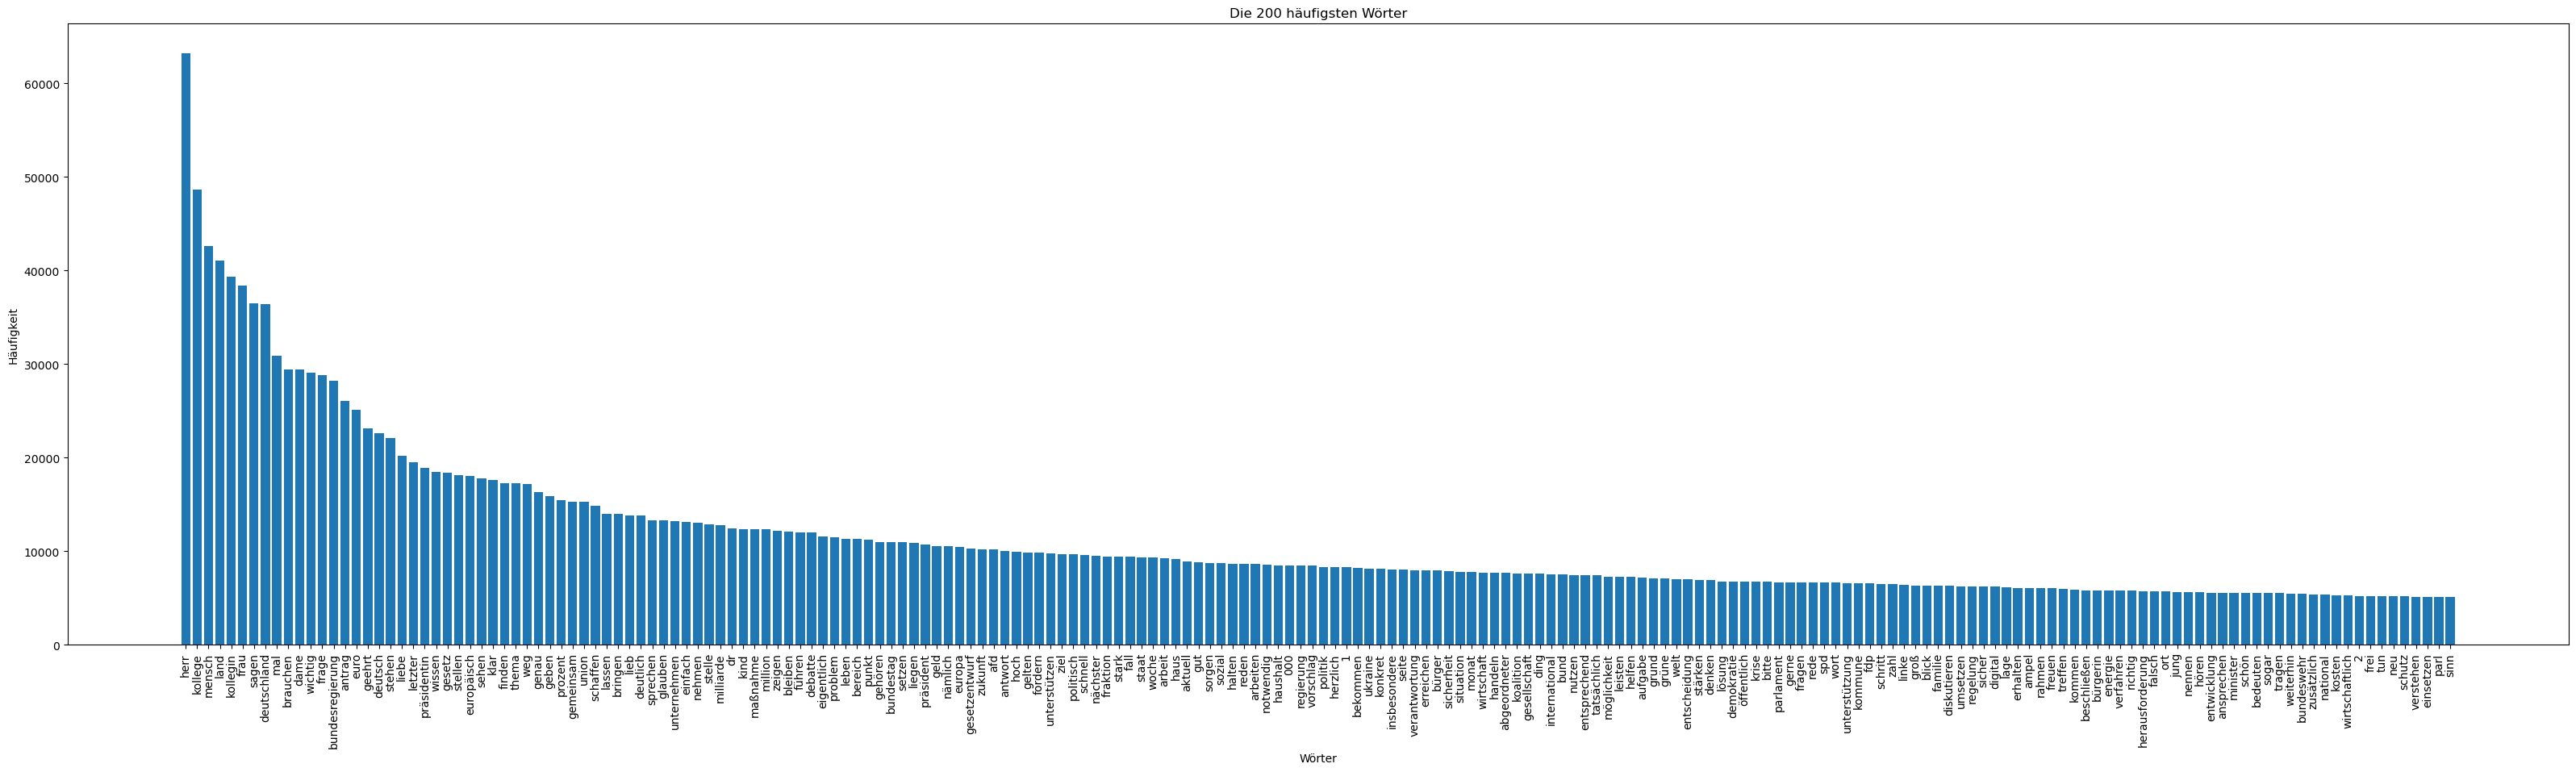

In [8]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import re

def analyse_haeufigste_woerter_from_csv(csv_path, spalte="rede", output_txt="haeufigste_woerter.txt"):
    """
    Liest eine CSV-Datei ein und analysiert die 200 häufigsten Wörter aus der angegebenen Spalte.
    Gibt absolute und relative Häufigkeiten zurück, visualisiert sie und speichert die Wörter in eine TXT-Datei.
    """
    # 1. CSV-Datei einlesen
    df = pd.read_csv(csv_path)

    # 2. Sicherstellen, dass die Spalte existiert
    if spalte not in df.columns:
        raise ValueError(f"Die Spalte '{spalte}' existiert nicht in der CSV-Datei.")

    # 3. Texte aus der Spalte kombinieren
    text = " ".join(df[spalte].dropna().astype(str))

    # 4. Vorverarbeitung: Entfernen von Sonderzeichen und Umwandeln in Kleinbuchstaben
    text_cleaned = re.sub(r'[^\w\s]', '', text).lower()

    # 5. Tokenisierung: Text in einzelne Wörter aufteilen
    words = text_cleaned.split()

    # 6. Zählen der Häufigkeiten aller Wörter
    word_counts = Counter(words)

    # 7. Die 200 häufigsten Wörter extrahieren
    most_common_words = word_counts.most_common(200)

    # 8. Relative Häufigkeit berechnen
    total_words = sum(word_counts.values())
    data = [
        {
            "Wort": word,
            "Häufigkeit": count,
        }
        for word, count in most_common_words
    ]

    # 9. Daten in einen DataFrame speichern
    df_result = pd.DataFrame(data)

    # 10. Die Wörter in eine TXT-Datei speichern
    with open(output_txt, "w", encoding="utf-8") as file:
        file.write(", ".join(f'"{word}"' for word, _ in most_common_words))

    print(f"Die 200 häufigsten Wörter wurden in '{output_txt}' gespeichert.")

    # 11. Diagramm erstellen
    plt.figure(figsize=(40, 10))
    plt.bar(df_result["Wort"], df_result["Häufigkeit"])
    plt.xticks(rotation=90)
    plt.title("Die 200 häufigsten Wörter")
    plt.xlabel("Wörter")
    plt.ylabel("Häufigkeit")
    plt.show()

# Pfad zur CSV-Datei
csv_path = "v2_2_stoppword_removal_wo_synonym_replacement.csv"  
csv_path2 = "v2_2_stoppword_removal_w_synonym_replacement.csv"

# Funktion aufrufen
analyse_haeufigste_woerter_from_csv(csv_path, spalte="text", output_txt="wo_synonym_replacement.txt")
analyse_haeufigste_woerter_from_csv(csv_path2, spalte="text", output_txt="w_synonym_replacement.txt")


Analyse auf Untershiede in Stoppwörden abhängig von den Synonymen - kaum Untschiede - Verwendung der Datei w_synonym_replacement für Stoppwordentfernung

In [9]:
w_synonym_replacement = ["herr", "kollege", "mensch", "land", "kollegin", "frau", "sagen", "deutschland", "mal", "brauchen", "dame", "wichtig", "frage", "bundesregierung", "antrag", "euro", "geehrt", "deutsch", "stehen", "liebe", "letzter", "präsidentin", "wissen", "gesetz", "stellen", "europäisch", "sehen", "klar", "finden", "thema", "weg", "genau", "geben", "prozent", "gemeinsam", "union", "schaffen", "lassen", "bringen", "lieb", "deutlich", "sprechen", "glauben", "unternehmen", "einfach", "nehmen", "stelle", "milliarde", "dr", "kind", "maßnahme", "million", "zeigen", "bleiben", "führen", "debatte", "eigentlich", "problem", "leben", "bereich", "punkt", "gehören", "bundestag", "setzen", "liegen", "präsident", "geld", "nämlich", "europa", "gesetzentwurf", "zukunft", "afd", "antwort", "hoch", "gelten", "fordern", "unterstützen", "ziel", "politisch", "schnell", "nächster", "fraktion", "stark", "fall", "staat", "woche", "arbeit", "haus", "aktuell", "gut", "sorgen", "sozial", "halten", "reden", "arbeiten", "notwendig", "haushalt", "000", "regierung", "vorschlag", "politik", "herzlich", "1", "bekommen", "ukraine", "konkret", "insbesondere", "seite", "verantwortung", "erreichen", "bürger", "sicherheit", "situation", "monat", "wirtschaft", "handeln", "abgeordneter", "koalition", "gesellschaft", "ding", "international", "bund", "nutzen", "entsprechend", "tatsächlich", "möglichkeit", "leisten", "helfen", "aufgabe", "grund", "grüne", "welt", "entscheidung", "stärken", "denken", "lösung", "demokratie", "öffentlich", "krise", "bitte", "parlament", "gerne", "fragen", "rede", "spd", "wort", "unterstützung", "kommune", "fdp", "schritt", "zahl", "linke", "groß", "blick", "familie", "diskutieren", "umsetzen", "regelung", "sicher", "digital", "lage", "erhalten", "ampel", "rahmen", "freuen", "treffen", "kommen", "beschließen", "bürgerin", "energie", "verfahren", "richtig", "herausforderung", "falsch", "ort", "jung", "nennen", "hören", "entwicklung", "ansprechen", "minister", "schön", "bedeuten", "sogar", "tragen", "weiterhin", "bundeswehr", "zusätzlich", "national", "kosten", "wirtschaftlich", "2", "frei", "tun", "neu", "schutz", "verstehen", "einsetzen", "parl", "sinn"]
wo_synonym_replacement = ["herr", "kollege", "mensch", "land", "kollegin", "frau", "sagen", "deutschland", "lieb", "mal", "brauchen", "dame", "wichtig", "frage", "bundesregierung", "antrag", "euro", "geehrt", "deutsch", "stehen", "letzter", "präsidentin", "stellen", "wissen", "gesetz", "europäisch", "sehen", "klar", "finden", "thema", "weg", "genau", "geben", "prozent", "gemeinsam", "union", "schaffen", "lassen", "bringen", "deutlich", "glauben", "sprechen", "unternehmen", "einfach", "nehmen", "milliarde", "stelle", "dr", "maßnahme", "führen", "million", "bleiben", "zeigen", "debatte", "kind", "eigentlich", "problem", "bereich", "leben", "punkt", "gehören", "bundestag", "setzen", "liegen", "präsident", "geld", "nämlich", "europa", "gesetzentwurf", "zukunft", "afd", "hoch", "unterstützen", "gelten", "antwort", "fordern", "ziel", "politisch", "schnell", "nächster", "stark", "fraktion", "fall", "woche", "staat", "haus", "arbeit", "aktuell", "reden", "arbeiten", "gut", "sorgen", "halten", "notwendig", "sozial", "haushalt", "regierung", "herzlich", "vorschlag", "politik", "bekommen", "ukraine", "konkret", "insbesondere", "erreichen", "seite", "verantwortung", "bürger", "situation", "monat", "sicherheit", "handeln", "abgeordneter", "koalition", "ding", "gesellschaft", "international", "nutzen", "entsprechend", "tatsächlich", "bund", "wirtschaft", "möglichkeit", "leisten", "helfen", "grüne", "aufgabe", "grund", "stärken", "welt", "entscheidung", "denken", "fragen", "lösung", "demokratie", "öffentlich", "parlament", "krise", "gerne", "spd", "wort", "unterstützung", "kommune", "fdp", "linke", "rede", "umsetzen", "schritt", "zahl", "bitte", "groß", "diskutieren", "blick", "regelung", "familie", "sicher", "digital", "lage", "freuen", "erhalten", "ampel", "rahmen", "treffen", "kommen", "ansprechen", "beschließen", "energie", "verfahren", "richtig", "herausforderung", "schön", "falsch", "ort", "jung", "nennen", "bürgerin", "hören", "minister", "bedeuten", "tragen", "sogar", "weiterhin", "entwicklung", "bundeswehr", "zusätzlich", "national", "kosten", "entscheiden", "wirtschaftlich", "frei", "verstehen", "tun", "schutz", "einsetzen", "neu", "parl", "sinn", "klimaschutz", "wert", "passieren"]

only_in_w = set(w_synonym_replacement) - set(wo_synonym_replacement)
only_in_wo = set(wo_synonym_replacement) - set(w_synonym_replacement)

only_in_w, only_in_wo


({'000', '1', '2', 'liebe'},
 {'entscheiden', 'klimaschutz', 'passieren', 'wert'})

Additional Stoppwords:

Anzeigen und manuelles selektieren der Stoppwörder

final_stoppwords = ["abgeordneten", "abgeordneter", "afd", "aktuell", "alexander", "beifall", "bereits", "bitte", "bündnis", "bündnisses", "cdu", "cdu/csu", "christian", "claudia", "dabei", "dafür", "dame", "damen", "dank", "danke", "daran", "darauf", "darum", "darüber", "davon", "deshalb", "deswegen", "deutlich", "ding", "dr", "dr.", "eben", "eigentlich", "endlich", "entsprechend", "erreichen", "erst", "falsch", "fdp", "frau", "ganz", "gar", "geehrt", "geehrte", "geht", "genau", "gerne", "grüne", "grünen", "herr", "herren", "herzlich", "herzlichen", "heute", "hoch", "insbesondere", "ja", "klar", "kollege", "kollegen", "kollegin", "kolleginnen", "konkret", "kubicki", "leider", "letzten", "letzter", "lieb", "liebe", "liegen", "linke", "linken", "länder", "lösung", "mal", "matthias", "mehr", "michael", "natürlich", "nehmen", "nein", "neu", "neue", "notwendig", "nächste", "nächster", "nämlich", "parl", "petra", "präsident", "präsidentin", "rede", "reden", "redner", "schon", "sogar", "sowie", "spd", "stark", "stephan", "stimmt", "tatsächlich", "thomas", "tun", "union", "vielleicht", "vizepräsident", "vizepräsidentin", "warum", "weg", "weitere", "weiterhin", "wichtig", "wirklich", "wolfgang", "wort", "zahl", "zuruf", "zusätzlich", "überhaupt", "geschätzter", "geschätzte"]

Entfernen von Stoppwörtern und Personen da ersichtlich wurde das diese in den Stoppwörter auftauchen. 


In [6]:
import pandas as pd
import spacy
from tqdm import tqdm

# CSV-Datei laden
file_path = "v2_2_stoppword_removal_w_synonym_replacement.csv"
output_file_path = "v2_2_3_additional_stoppwords_removed.csv"
df = pd.read_csv(file_path)

final_stoppwords = ["geschätzter", "geschätzte", "abgeordneten", "abgeordneter", "afd", "aktuell", "alexander", "beifall", "bereits", "bitte", "bündnis", "bündnisses", "cdu", "cdu/csu", "christian", "claudia", "dabei", "dafür", "dame", "damen", "dank", "danke", "daran", "darauf", "darum", "darüber", "davon", "deshalb", "deswegen", "deutlich", "ding", "dr", "dr.", "eben", "eigentlich", "endlich", "entsprechend", "erreichen", "erst", "falsch", "fdp", "frau", "ganz", "gar", "geehrt", "geehrte", "geht", "genau", "gerne", "grüne", "grünen", "herr", "herren", "herzlich", "herzlichen", "heute", "hoch", "insbesondere", "ja", "klar", "kollege", "kollegen", "kollegin", "kolleginnen", "konkret", "kubicki", "leider", "letzten", "letzter", "lieb", "liebe", "liegen", "linke", "linken", "länder", "lösung", "mal", "matthias", "mehr", "michael", "natürlich", "nehmen", "nein", "neu", "neue", "notwendig", "nächste", "nächster", "nämlich", "parl", "petra", "präsident", "präsidentin", "rede", "reden", "redner", "schon", "sogar", "sowie", "spd", "stark", "stephan", "stimmt", "tatsächlich", "thomas", "tun", "union", "vielleicht", "vizepräsident", "vizepräsidentin", "warum", "weg", "weitere", "weiterhin", "wichtig", "wirklich", "wolfgang", "wort", "zahl", "zuruf", "zusätzlich", "überhaupt"]

# Konvertiere die Stoppwörter-Liste in Kleinbuchstaben
custom_stopwords = [word.lower() for word in final_stoppwords]

# CSV einlesen
data = pd.read_csv(file_path)

# Lade das deutsche Sprachmodell von spaCy
nlp = spacy.load("de_core_news_sm")

# Bereinigungsfunktion
def clean_text(text):
    if not isinstance(text, str):  # Leere oder nicht-String-Werte ignorieren
        return ""
    
    # In Lowercase umwandeln
    text = text.lower()
    
    # Verwende spaCy, um den Text zu analysieren
    doc = nlp(text)
    
    # Entferne benannte Entitäten vom Typ 'PER' (Personen)
    tokens = [
        token.text for token in doc 
        if token.ent_type_ != "PER" and token.is_alpha  # Entferne Personen und nicht-alphabetische Tokens
    ]
    
    # Entferne benutzerdefinierte Stoppwörter
    tokens = [word for word in tokens if word not in custom_stopwords]
    
    return " ".join(tokens)

# Fortschrittsanzeige und Bereinigung
print("Bereinige Reden und entferne Personen sowie Stoppwörter...")
data['text'] = [
    clean_text(str(text)) for text in tqdm(data['text'], desc="Bereinigung", total=len(data))
]

# Berechnung der Statistiken
print("Berechne Statistiken...")
word_counts = data['text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

max_words = word_counts.max()
min_words = word_counts.min()
avg_words = word_counts.mean()

# Ergebnisse ausgeben
print(f"Maximale Wörter pro Eintrag: {max_words}")
print(f"Minimale Wörter pro Eintrag: {min_words}")
print(f"Durchschnittliche Wörter pro Eintrag: {avg_words:.2f}")

# Ergebnisse speichern
data.to_csv(output_file_path, index=False)

print(f"Bereinigte Daten wurden in {output_file_path} gespeichert.")

Bereinige Reden und entferne Personen sowie Stoppwörter...


Bereinigung: 100%|██████████| 34428/34428 [12:21<00:00, 46.41it/s] 


Berechne Statistiken...
Maximale Wörter pro Eintrag: 3525
Minimale Wörter pro Eintrag: 0
Durchschnittliche Wörter pro Eintrag: 184.08
Bereinigte Daten wurden in v2_2_3_additional_stoppwords_removed.csv gespeichert.


Maximale Wörter pro Eintrag: 3525
Minimale Wörter pro Eintrag: 0
Durchschnittliche Wörter pro Eintrag: 184.08

